## лабораторная работа 6
### «реализация собственного пакета модулей для манипулирования плоскими фигурами».

#### суммарная сложность = 6

### задание 1

In [1]:
# визуализация последовательностей фигур
import matplotlib.pyplot as plt
from copy import deepcopy

def visualise(*sequences):
    """
    Визуализация последовательности полигонов, представленной в виде итератора
    :param sequences: список/списки координат фигур (list) или несколько списков 
    :return: None
    """
    
    for list_of_figures in deepcopy(sequences):  # deepcopy иначе данные стираются
        for fig in list_of_figures:
            # Разделяем координаты X и Y
            x = [point[0] for point in fig]
            y = [point[1] for point in fig]
            # Задаем стиль и цвет линий
            plt.plot(x + [x[0]], y + [y[0]], color='r', marker=',')  # разобраться !!! с plot()

    # Добавляем заголовок и подписи к осям
    plt.title('Фигуры\n')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')  # Чтобы сохранить соотношение сторон прямоугольников
    
    # Добавление осей
    plt.axhline(0, color='gray',linewidth=1)
    plt.axvline(0, color='gray',linewidth=1)

    # Показываем график
    plt.show()
    

### задание 2

In [2]:
# генераторы последовательностей

def gen_rectangle(side_len=1):
    """
    Генератор 'ленты' прямоугольников с координатами вида ((x1, y1), (x2, y2), (x3, y3), (x4, y4))

    (x2, y2) .______. (x3, y3)
             |      |
    (x1, y1) .______. (x4, y4)

    :param side_len: длина стороны (int, float)
    :return: кортеж координат углов прямоугольника (tuple)
    """
    x1, y1 = 0, 0
    x2, y2 = 0, side_len
    x3, y3 = side_len, side_len
    x4, y4 = side_len, 0
    interval = 1.5 * side_len  # расстояние между x1, x2, x3, x4 одной фигуры и x1, x2, x3, x4 второй соответственно
    while True:
        yield (x1, y1), (x2, y2), (x3, y3), (x4, y4)
        x1 += interval
        x2 += interval
        x3 += interval
        x4 += interval
        

def gen_triangle(side_len=1):
    """
    Генератор 'ленты' треугольников с координатами вида ((x1, y1), (x2, y2), (x3, y3))
    :param side_len: длина стороны (int, float)
    :return: кортеж координат углов треугольников (tuple)
    """
    x1, y1 = 0, 0
    x2, y2 = side_len, 0
    x3, y3 = side_len/2, side_len*3**0.5/2
    interval = 1.5 * side_len  # расстояние между x1, x2, x3, x4 одной фигуры и x1, x2, x3, x4 второй соответственно
    while True:
        yield (x1, y1), (x2, y2), (x3, y3)
        x1 += interval
        x2 += interval
        x3 += interval
      
    
def gen_hexagon(side_len=1):
    """
    Генератор 'ленты' шестиугольников с координатами вида ((x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6))
    :param side_len: длина стороны (int, float)
    :return: кортеж координат углов шестиугольников (tuple)
    """
    h = side_len*3**0.5/2  # высота
    x1, y1 = 0, 0
    x2, y2 = -side_len*0.5, h
    x3, y3 = 0, 2*h
    x4, y4 = side_len, 2*h
    x5, y5 = side_len*1.5, h
    x6, y6 = side_len, 0
    interval = 2.5 * side_len  # расстояние между x1, x2, x3, x4 одной фигуры и x1, x2, x3, x4 второй соответственно
    while True:
        yield (x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6)
        x1 += interval
        x2 += interval
        x3 += interval
        x4 += interval
        x5 += interval
        x6 += interval
 

In [3]:
# создание списка координат фигур из последовательности определенной длины

def figures_list(generator, side_len=1, number_of_figures=1):
    """
    Создает список определенной длины координат фигур полученных с помощью генератора
    :param side_len: длина стороны фигуры (int, float)
    :param generator: генератор координат фигур
    :param number_of_figures: количество фигур в списке ('ленте') (int)
    :return: список координат фигур (list)
    """
    lst = []
    for number, figure in enumerate(generator(side_len)):
        if number == number_of_figures:
            break
        lst.append(figure)
    return lst


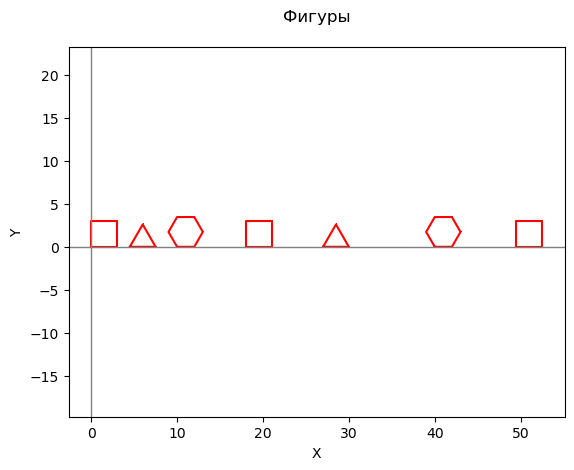

In [4]:
# генерация 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники
from itertools import cycle


n = 7  # количество смешанных фигур 
gen1 = gen_rectangle(3)
gen2 = gen_triangle(3)
gen3 = gen_hexagon(2)
# Генерация последовательности смешанных фигур (прямоугольники, треугольники, шестиугольники)
combined_gen = cycle([gen1, gen2, gen3])

# Генерируем элементы и сохраняем их в список
result_list = []      
for i in range(n):
    gen = next(combined_gen)
    for num, item in enumerate(gen):
        if num == i:
            result_list.append(item)
            break

# визуализация
visualise(result_list)


### задание 3

In [5]:
# реализация операций: параллельный перенос; поворот; симметрия; гомотетия
import math 


def tr_translate(figure, displacement_x=0, displacement_y=0):
    """
    Параллельный перенос (создается новый объект)
    :param displacement_y: на сколько смещаемся по оси X (int, float)
    :param displacement_x: на сколько смещаемся по оси Y (int, float)
    :param figure: последовательность координат фигуры(tuple)
    :return: последовательность новых координат фигуры (tuple)
    """
    new_figure = []
    for point in figure:
        new_point = (point[0]+displacement_x, point[1]+displacement_y)
        new_figure.append(new_point)
    return tuple(new_figure)


def tr_symmetry(figure):
    """
    Симметрия  (создается новый объект)
    :param figure: последовательность координат фигуры(tuple)
    :return: последовательность новых координат фигуры (tuple)
    """
    new_figure = []
    for point in figure:
        new_point = (point[0], point[1]*(-1))
        new_figure.append(new_point)
    return tuple(new_figure)


def tr_rotate(figure, alpha=0):
    """
    Симметрия  (создается новый объект)
    :alpha: угол для поворота в радианах (int, float) 1rad × 180/π = 57.296°
    :param figure: последовательность координат фигуры(tuple)
    :return: последовательность новых координат фигуры (tuple)
    """
    # вращаем систему координат
    new_figure = []
    for point in figure:
        # используем ангем
        # требуется перейти от системы координат хОу к новой системе координат  (с тем же самым началом О), 
        # которая получается при повороте осей координат на alpha
        new_point = (point[0]*math.cos(alpha)-point[1]*math.sin(alpha), point[1]*math.cos(alpha)+point[0]*math.sin(alpha))
        new_figure.append(new_point)
    return tuple(new_figure)
     
    
def tr_homothety (figure, x0=0, y0=0, k=1):
    """
    Гомотетия   (создается новый объект)
    :k: коэффициент для гомотетии (int, float)
    :y0: координата по оси х для центра гомотетии (int, float)
    :x0: координата по оси y для центра гомотетии (int, float)
    :param figure: последовательность координат фигуры(tuple)
    :return: последовательность новых координат фигуры (tuple)
    """
    new_figure = []
    for point in figure:
        # изменяем координаты в соответствии с правилами гомотетии
        new_point = (x0+(point[0]-x0)*k, y0+(point[1]-y0)*k)
        new_figure.append(new_point)
    return tuple(new_figure)
     

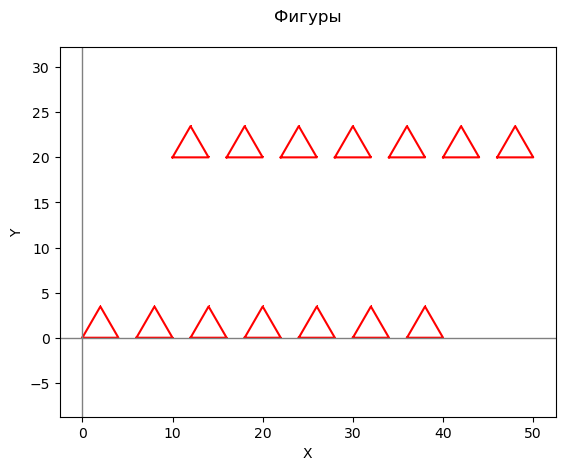

In [6]:
# примеры работы операций: параллельный перенос

fig_lst = figures_list(gen_triangle, side_len=4, number_of_figures=7)  # создаем список фигур
new_fig_lst = map(lambda x: tr_translate(x, displacement_x=10, displacement_y=20), fig_lst)  # создаем список фигур перемещая уже существующие
visualise(new_fig_lst, fig_lst)

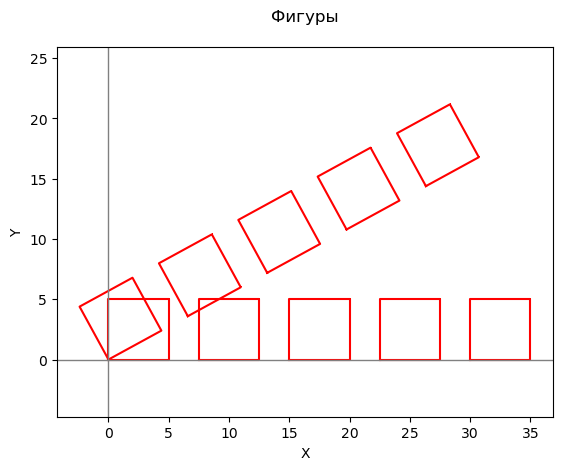

In [7]:
# примеры работы операций: поворот

fig_lst = figures_list(gen_rectangle, side_len=5, number_of_figures=5)  # создаем список фигур
new_fig_lst_rec = map(lambda x: tr_rotate(x, 0.5), fig_lst)  # создаем список фигур перемещая уже существующие
visualise(new_fig_lst_rec, fig_lst)

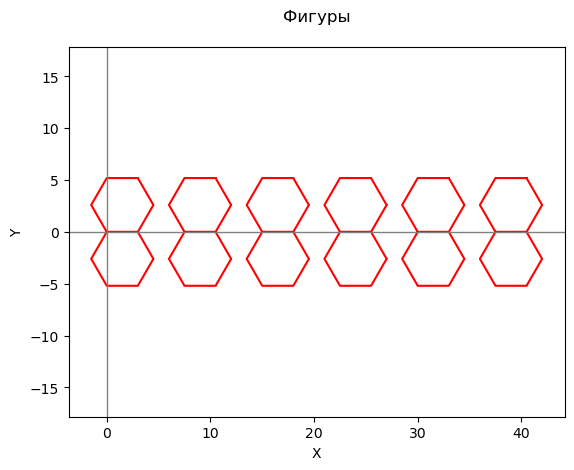

In [8]:
# примеры работы операций: симметрия

fig_lst = figures_list(gen_hexagon, side_len=3, number_of_figures=6)  # создаем список фигур
new_fig_lst = map(lambda x: tr_symmetry(x), fig_lst)  # создаем список фигур перемещая уже существующие
visualise(new_fig_lst, fig_lst)

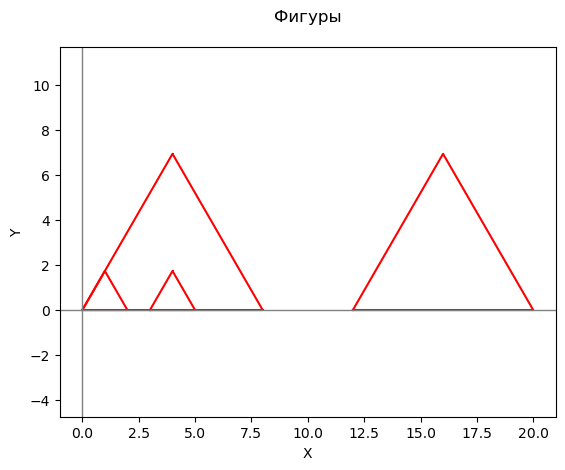

In [9]:
# примеры работы операций: гомотетия 

fig_lst = figures_list(gen_triangle, side_len=2, number_of_figures=2)  # создаем список фигур
new_fig_lst = map(lambda x: tr_homothety(x, k=4), fig_lst)  # создаем список фигур перемещая уже существующие
visualise(new_fig_lst, fig_lst)

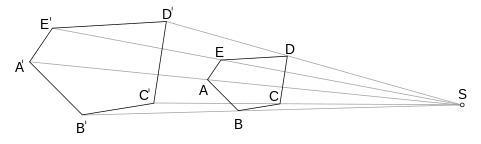

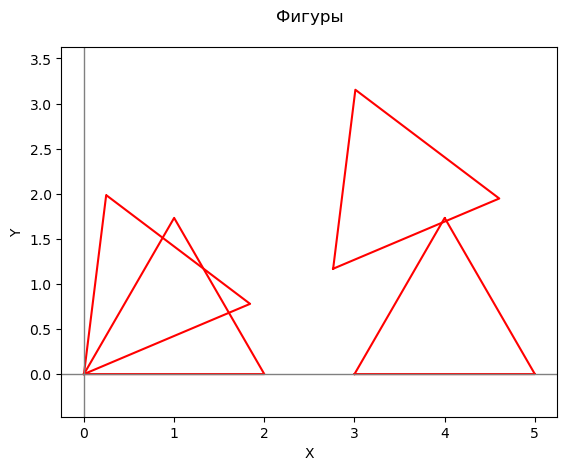

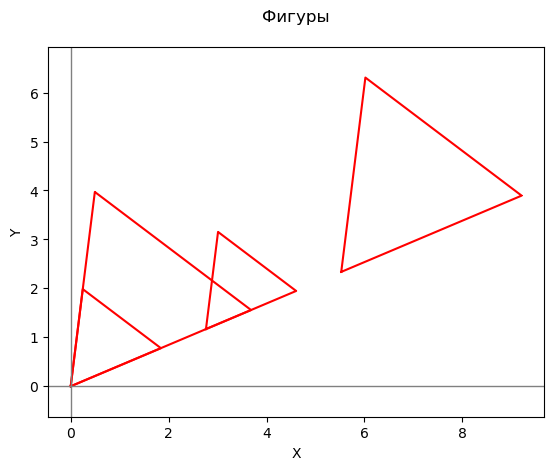

In [10]:
# примеры работы операций: гомотетия
from copy import deepcopy


# deepcopy иначе данные стираются
fig_lst = figures_list(gen_triangle, side_len=2, number_of_figures=2)  # создаем список фигур
fig_lst_2 = map(lambda x: tr_rotate(x, 0.4), deepcopy(fig_lst)) 
visualise(fig_lst, fig_lst_2)
new_fig_lst = map(lambda x: tr_homothety(x, k=2), deepcopy(fig_lst_2)) # создаем список фигур перемещая уже существующие
visualise(fig_lst_2, new_fig_lst)


### задание 4

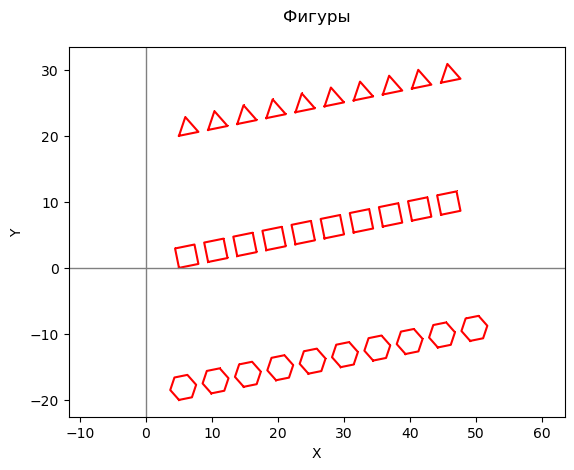

In [11]:
# 4.1
# 3 параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x

# создаем 3 ленты
fig_lst_1 = figures_list(gen_triangle, side_len=3, number_of_figures=10) 
fig_lst_2 = figures_list(gen_rectangle, side_len=3, number_of_figures=10) 
fig_lst_3 = figures_list(gen_hexagon, side_len=2, number_of_figures=10) 

# поворачиваем ленты
rotated_fig_lst_1 = map(lambda x: tr_rotate(x, 0.2), fig_lst_1)  
rotated_fig_lst_2 = map(lambda x: tr_rotate(x, 0.2), fig_lst_2) 
rotated_fig_lst_3 = map(lambda x: tr_rotate(x, 0.2), fig_lst_3) 

# делаем параллельный перенос для нормальной визуализации
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=20), rotated_fig_lst_1)
res_fig_lst_2 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=0), rotated_fig_lst_2)
res_fig_lst_3 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=-20), rotated_fig_lst_3)

# визуализация
visualise(res_fig_lst_1, res_fig_lst_2, res_fig_lst_3)

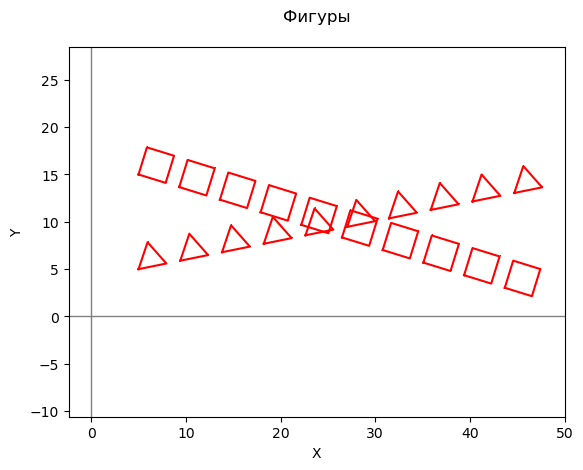

In [12]:
# 4.2
# две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат

# создаем 2 ленты
fig_lst_1 = figures_list(gen_triangle, side_len=3, number_of_figures=10) 
fig_lst_2 = figures_list(gen_rectangle, side_len=3, number_of_figures=10) 

# поворачиваем ленты
rotated_fig_lst_1 = map(lambda x: tr_rotate(x, 0.2), fig_lst_1)  
rotated_fig_lst_2 = map(lambda x: tr_rotate(x, -0.3), fig_lst_2) 

# делаем параллельный перенос для нормальной визуализации
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=5), rotated_fig_lst_1)
res_fig_lst_2 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=15), rotated_fig_lst_2)

# визуализация
visualise(res_fig_lst_1, res_fig_lst_2)

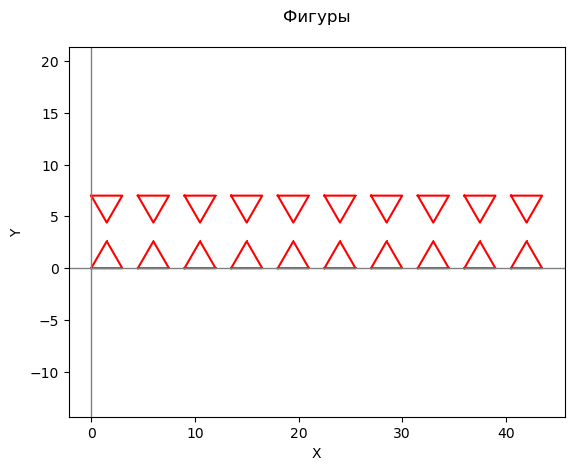

In [13]:
# 4.3
# две параллельных ленты треугольников, ориентированных симметрично друг к другу

# создаем 2 ленты
fig_lst_1 = figures_list(gen_triangle, side_len=3, number_of_figures=10) 
res_fig_lst_2 = figures_list(gen_triangle, side_len=3, number_of_figures=10) 

# отзеркаливаем одну из лент
rotated_fig_lst_1 = map(lambda x: tr_symmetry(x), fig_lst_1)  

# делаем параллельный перенос для нормальной визуализации
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=0, displacement_y=7), rotated_fig_lst_1)

# визуализация
visualise(res_fig_lst_1, res_fig_lst_2)

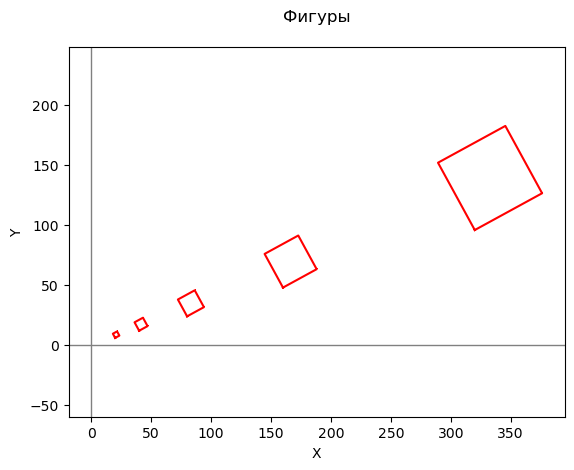

In [14]:
# более понятный пример гомотетии
# 4.4
# последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат
from copy import deepcopy


# deepcopy иначе данные стираются
fig_lst_1 = figures_list(gen_rectangle, side_len=2, number_of_figures=1)

# поворачиваем ленты
fig_lst_1 = map(lambda x: tr_rotate(x, 0.5), deepcopy(fig_lst_1)) 

# делаем параллельный перенос для нормальной визуализации
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=10, displacement_y=3), fig_lst_1)

# делаем гомотетию
fig_1 = map(lambda x: tr_homothety(x, k=2), deepcopy(res_fig_lst_1)) 
fig_2 = map(lambda x: tr_homothety(x, k=2), deepcopy(fig_1)) 
fig_3 = map(lambda x: tr_homothety(x, k=2), deepcopy(fig_2)) 
fig_4 = map(lambda x: tr_homothety(x, k=2), deepcopy(fig_3)) 
fig_5 = map(lambda x: tr_homothety(x, k=2), deepcopy(fig_4)) 

# визуализация
visualise(fig_1, fig_2, fig_3, fig_4, fig_5)


### задание 5 

(сложность 2)


In [162]:
# new
# 5.1
# фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon )
import numpy as np


def flt_convex_polygon(fig):
    """
    филтрация списка по признаку - выпуклый многоугольник 
    объяснение метода проверки выпуклости многоугольника:
    https://studizba.com/lectures/informatika-i-programmirovanie/algoritmy-kompyuternoy-grafiki/3520-opredelenie-vypuklosti-mnogougolnika.html
    обход против часовой стрелки
    
    :fig: фигура
    :return: выпуклая или нет (bool)
    """
    convex = True
    n = len(fig)
    for i in range(n):
        A = np.matrix(f'{fig[i][0]} {fig[i][1]} 1; {fig[(i+1)%n][0]} {fig[(i+1)%n][1]} 1; {fig[(i+2)%n][0]} {fig[(i+2)%n][1]} 1')
        if np.linalg.det(A) > 0:  # определитель матрицы больше или меньше 0
            convex = False
            break
    if convex:
        return True
    return False 


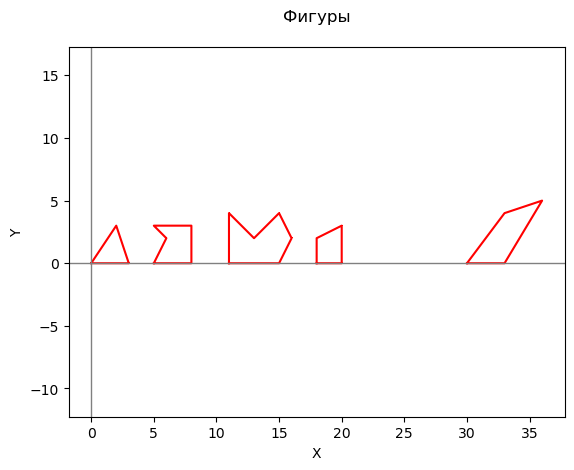

[((0, 0), (2, 3), (3, 0)), ((18, 0), (18, 2), (20, 3), (20, 0)), ((30, 0), (33, 4), (36, 5), (33, 0))]


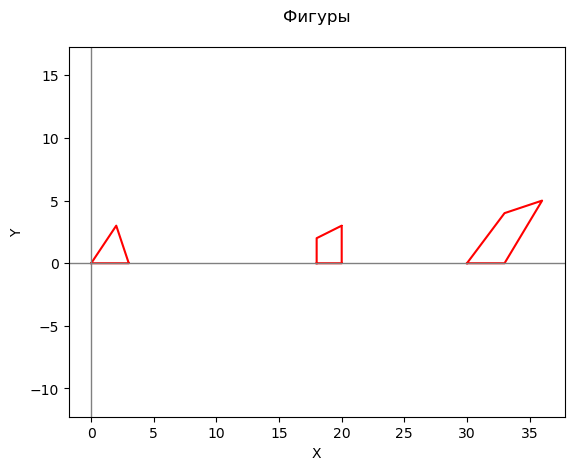

In [163]:
# new
# так как нет генератора невыпуклых многоугольников, то зададим список фигур вручную
figures = [
    ((0, 0), (2, 3), (3, 0)), 
    ((5, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((18, 0), (18, 2), (20, 3), (20, 0)),
    ((30, 0), (33, 4), (36, 5), (33, 0)), 
        ]

visualise(figures)
print(list(filter(flt_convex_polygon, figures)))
visualise(filter(flt_convex_polygon, figures))


In [164]:
# new
# 5.2
# фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point )

def flt_angle_point(fig, point):
    """
    фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой
    :fig: фигура
    :point: заданная точка
    :return: bool
    """
    return point in fig

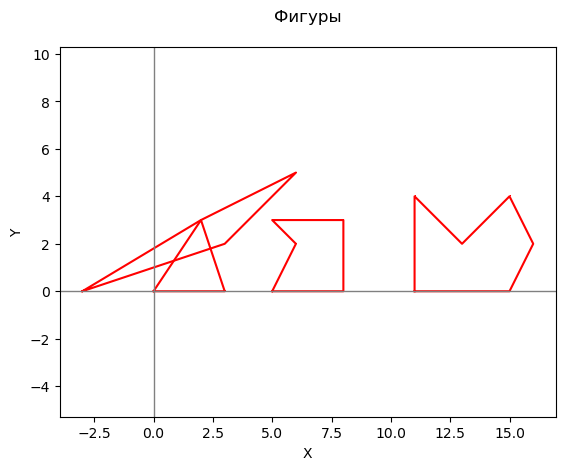

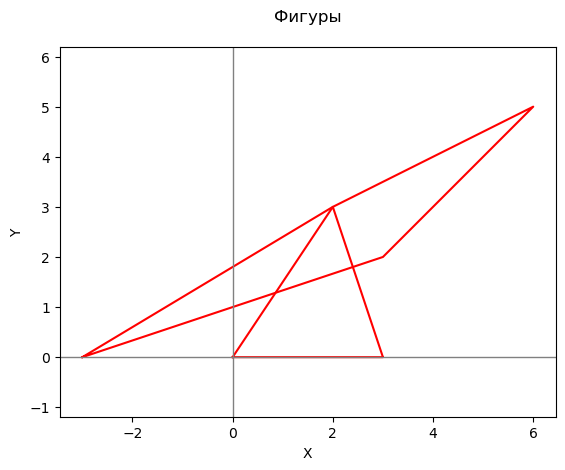

In [165]:
# new
figures = [
    ((0, 0), (2, 3), (3, 0)), 
    ((5, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((-3, 0), (3, 2), (6, 5), (2, 3)), 
        ]

visualise(figures)
visualise(filter( lambda x: flt_angle_point(x, (2, 3)), figures))

In [166]:
# new
# 5.3
# фильтрации фигур, имеющих площадь менее заданной ( flt_square )


def polygon_area(figure):
    """
    Вычисление площади многоугольника
    :figure: последовательность координат фигуры
    :return: площадь многоугольника (float)
    """
    # находим площади используя numpy 
    # Векторное произведение между соседними векторами(которые соединяют соседние вершины).
    cross_products = [np.cross(figure[i], figure[(i+1) % len(figure)]) for i in range(len(figure))]
    # суммирование векторных произведений
    signed_area = sum(cross_products)
    # Take the absolute value of the signed area to get the area.
    area = abs(signed_area) / 2

    return area

def flt_area(fig, area):
    """
    фильтрации фигур, имеющих площадь менее заданной 
    :fig: фигура
    :area: заданная площадь
    :return: (bool)
    """
    return polygon_area(fig) < area


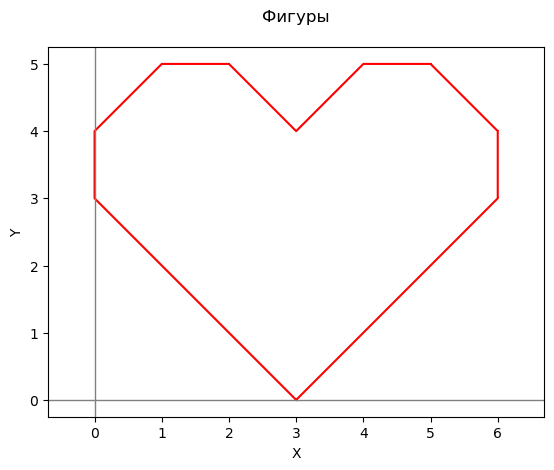

19.0


In [167]:
# new
figure = [[(3, 0), (0, 3), (0, 4), (1, 5), (2, 5), (3, 4), (4, 5), (5, 5), (6, 4), (6, 3)]]
visualise(figure)
print(polygon_area(*figure))  # должно быть 19 единиц

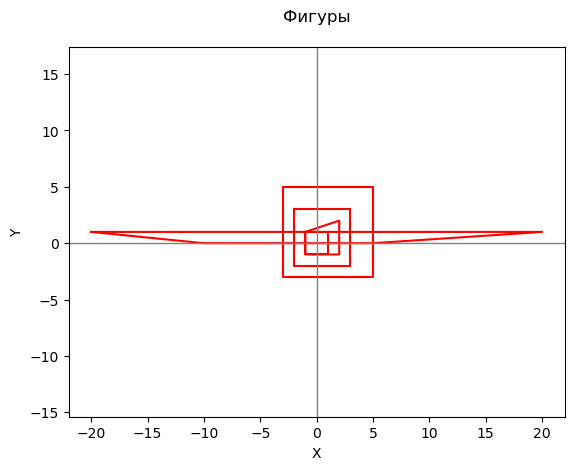

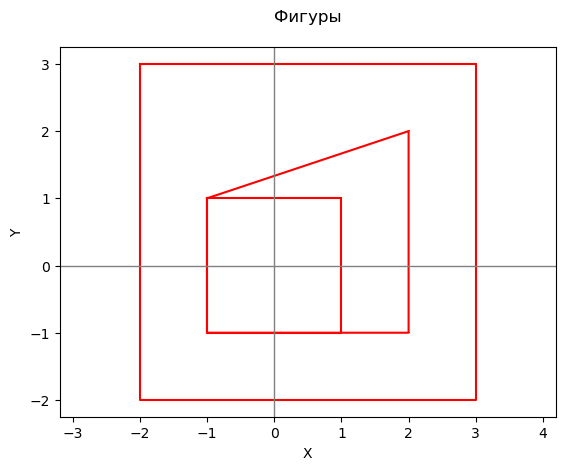

In [168]:
# new
figures = [
    ((-1, 1), (1, 1), (1, -1), (-1, -1)), 
    ((-1, 1), (2, 2), (2, -1), (-1, -1)), 
    ((-2, 3), (3, 3), (3, -2), (-2, -2)), 
    ((-3, 5), (5, 5), (5, -3), (-3, -3)), 
    ((-20, 1), (20, 1), (5, 0), (-10, 0)),
        ]

visualise(figures)
visualise(filter(lambda x: flt_area(fig=x, area=26), figures))

In [182]:
# new
# 5.4
# фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side )

def flt_short_side(fig, length):
    """
    фильтрации фигур, имеющих кратчайшую сторону менее заданного значения
    :fig: фигура
    :length: заданное значение для сравнения
    :return: (bool)
    """
    # Получение длин сторон фигуры.
    side_lengths = [np.linalg.norm((fig[i][0] - fig[(i+1) % len(fig)][0], fig[i][1] - fig[(i+1) % len(fig)][1])) for i in range(len(fig))]
    # Проверка кратчайшей стороны
    if min(side_lengths) < length:
        return True
    return False


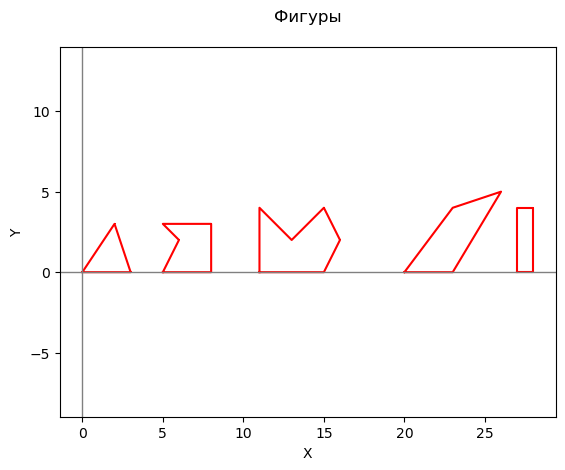

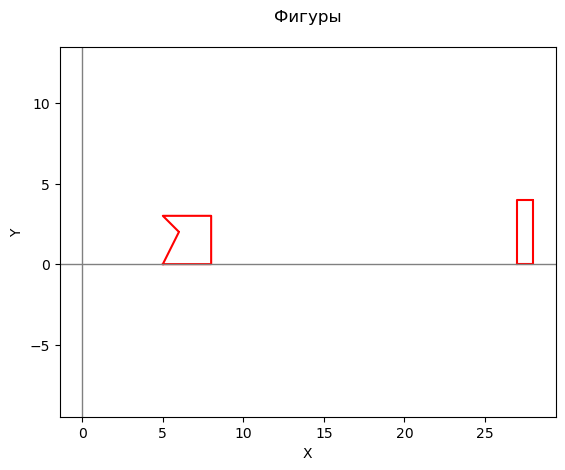

In [183]:
# new
figures = [
    ((0, 0), (2, 3), (3, 0)), 
    ((5, 0), (6, 2), (5, 3), (8, 3), (8, 0)),  # мин сторона = корень из 2
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0)),   # мин сторона = 1
        ]

visualise(figures)
visualise(filter( lambda x: flt_short_side(x, 2), figures))

In [234]:
# new
# 5.5
# фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside )

def flt_point_inside(fig, point):
    """
    фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника)
    :fig: фигура
    :point: заданная точка
    :return: (bool)
    """
    # вычисляем векторное произведение(cross_product) вектора от точки до каждой вершины многоугольника.
    # все произведения объединяем в список
    cross_products = [np.cross((point[0] - fig[i][0], point[1] - fig[i][1]), (fig[(i+1) % len(fig)][0] - fig[i][0], fig[(i+1) % len(fig)][1] - fig[i][1])) for i in range(len(fig))]

    # если знаки всех cross_product совпадают, то точка лежит внутри фигуры
    if False not in [True if np.sign(cross_product) == np.sign(cross_products[0]) else False for cross_product in cross_products]:
        return True
    return False

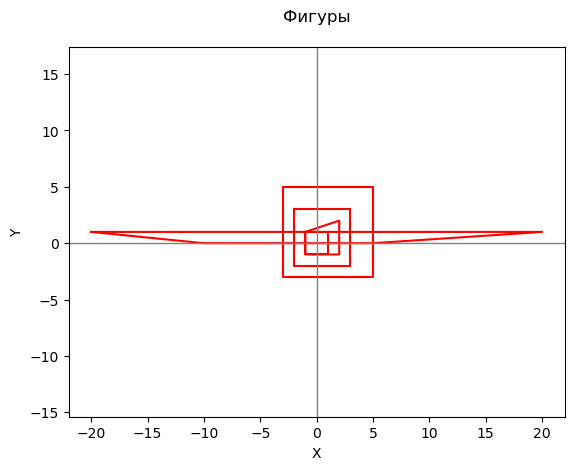

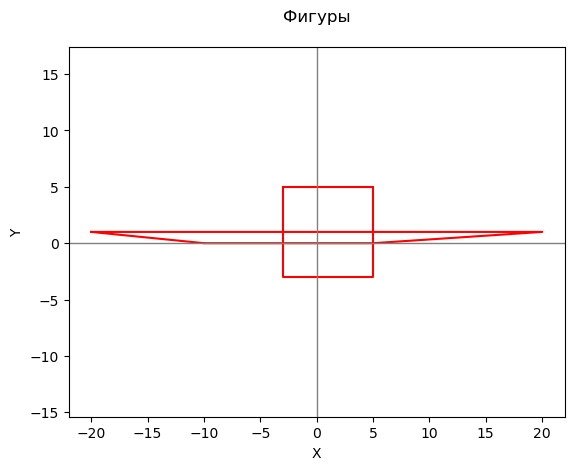

In [235]:
# new
figures = [
    ((-1, 1), (1, 1), (1, -1), (-1, -1)), 
    ((-1, 1), (2, 2), (2, -1), (-1, -1)), 
    ((-2, 3), (3, 3), (3, -2), (-2, -2)), 
    ((-3, 5), (5, 5), (5, -3), (-3, -3)), 
    ((-20, 1), (20, 1), (5, 0), (-10, 0)),
        ]

visualise(figures)
figures_5_5 = filter( lambda x: flt_point_inside(x, (4.5, 0.5)), figures)
visualise(figures_5_5)

In [230]:
# new
# 5.6
# фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside )

def flt_polygon_angles_inside(figure, polygon):
    """
    фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника)
    :figure: многоугольник из последовательности
    :polygon: заданный многоугольник
    :return: (bool)
    """
    # получение углов заданного многоугольника
    polygon_angles = get_angles(polygon)
    figure_angles = get_angles(figure)
    
    # если значения углов совпадают и эти углы из одной точеи => нам эта фигура подходит
    for i in range(len(figure_angles)):
        if figure_angles[i] in polygon_angles:
            j = figure_angles.index(figure_angles[i])
            if figure[i] == polygon[j]:
                return True
    return False


def get_angles(figure):
    """
    получение углов фигуры
    :figure: фигура, представленная как список координат (x, y)
    :return: список углов
    """
    # преобразование фигуры в список векторов
    vectors = []
    for i in range(len(figure)):
        vector = (figure[i][0] - figure[(i - 1) % len(figure)][0], figure[i][1] - figure[(i - 1) % len(figure)][1])
        vectors.append(vector)

    # вычисление углов между векторами
    angles = []
    for i in range(len(vectors)):
        angle = math.atan2(vectors[i][1], vectors[i][0])
        angles.append(angle)

    # возврат углов
    return angles


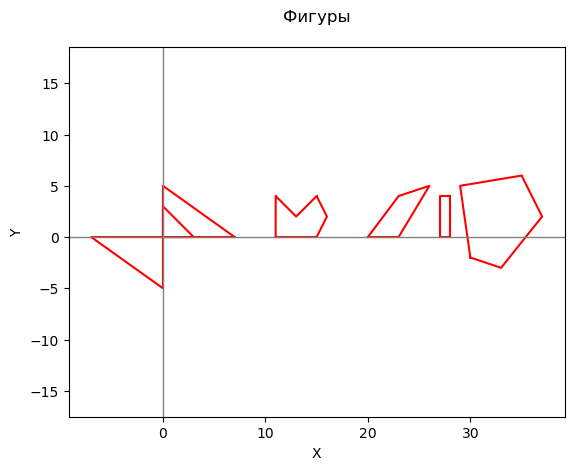

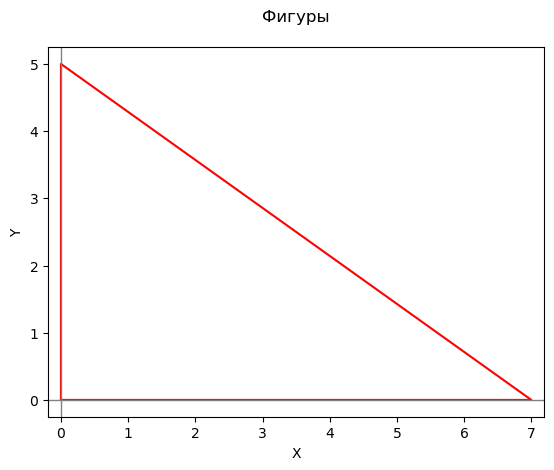

In [231]:
# new
figures = [
    ((0, 0), (0, 5), (7, 0)),  
    ((0, 0), (0, -5), (-7, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0)),
    ((30, -2), (29, 5), (35, 6), (37, 2), (33, -3)),
        ]

polygon = ((0, 0), (0, 3), (3, 0))
visualise(figures, [polygon])
visualise(filter(lambda x: flt_polygon_angles_inside(x, polygon), figures))

### задание 6

(сложность 1)

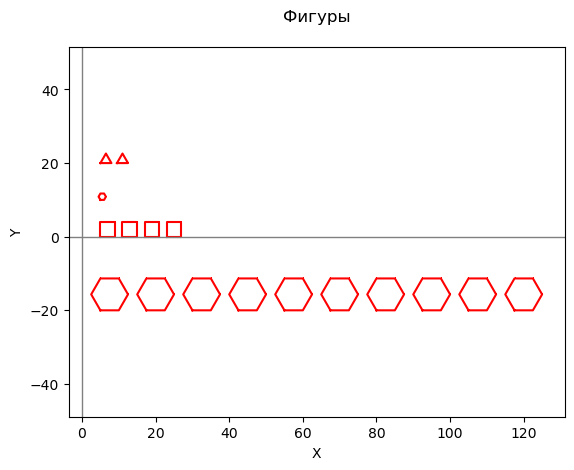

4.0


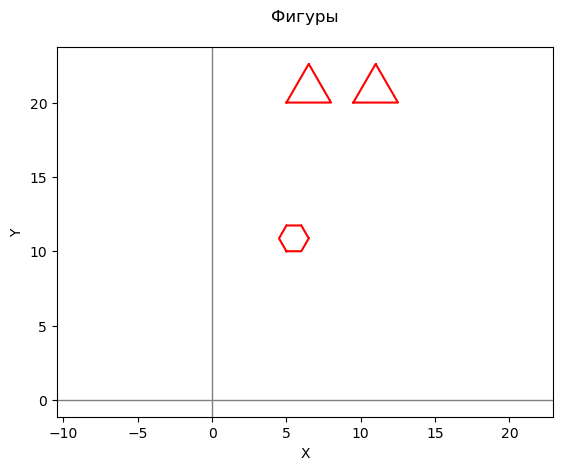

In [28]:
# 6.2
# используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур, 
# которые имеют различный масштаб и выбрать из них (подбором параметра фильтрации) не более 4х фигур, 
# имеющих кратчайшую сторону менее заданного значения;

# подбор параметра фильтрации lenght так, чтобы было отфильтровано не более 4 фигур
def choose_len(figures, n_figs = 4):
    """
    подбор параметра фильтрации - длина для минимальной стороны, чтобы отфильтровать не менее n_figs фигур
    :figures: последовательность фигур
    :n_figs: не более скольки фигур нужно будет отфильтровать
    :return: значение параметра фильтрации (float)
    """
    min_sides = []
    for figure in figures:
        # получение длин сторон фигуры.
        side_lengths = [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        min_sides.append(min(side_lengths))

    sorted_min_sides = sorted(min_sides)
    length = sorted_min_sides[n_figs]
    for i in range(n_figs-1):
        if sorted_min_sides[n_figs-1] == sorted_min_sides[n_figs]:
            length = sorted_min_sides[n_figs-1]
    if sorted_min_sides[0] == sorted_min_sides[1]:
        length = 0
        
    return length


# создаем фигуры  (после фильтрации должно остаться 2)
fig_lst_4 = figures_list(gen_hexagon, side_len=1, number_of_figures=1) 
fig_lst_1 = figures_list(gen_triangle, side_len=3, number_of_figures=2) 
fig_lst_2 = figures_list(gen_rectangle, side_len=4, number_of_figures=4) 
fig_lst_3 = figures_list(gen_hexagon, side_len=5, number_of_figures=10) 

# делаем параллельный перенос для нормальной визуализации
res_fig_lst_4 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=10), deepcopy(fig_lst_4))
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=20), deepcopy(fig_lst_1))
res_fig_lst_2 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=0), deepcopy(fig_lst_2))
res_fig_lst_3 = map(lambda x: tr_translate(x, displacement_x=5, displacement_y=-20), deepcopy(fig_lst_3))

# визуализация
visualise(res_fig_lst_4, res_fig_lst_1, res_fig_lst_2, res_fig_lst_3)
figures_6_2 = list(res_fig_lst_4) + list(res_fig_lst_1) + list(res_fig_lst_2) + list(res_fig_lst_3)

length = choose_len(figures_6_2)         
print(length)

# фильтрация с полученным параметром
visualise(flt_short_side(figures_6_2, length))


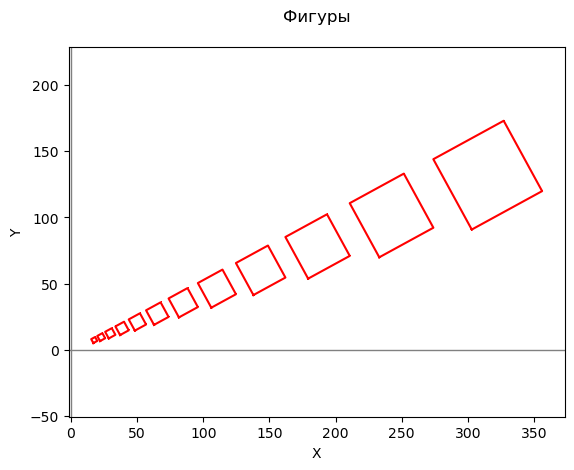

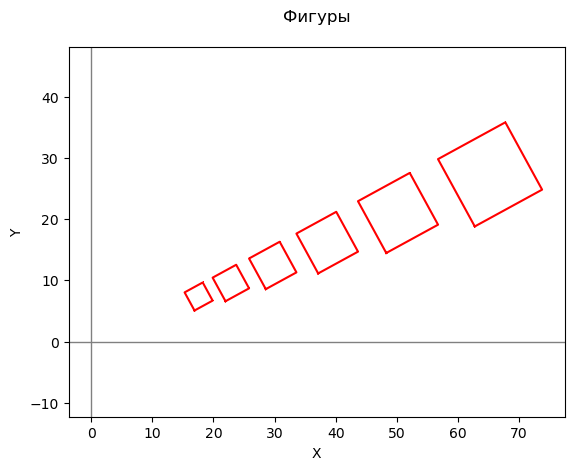

In [29]:
# 6.1
# фильтрация фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено 6 фигур;

# deepcopy иначе данные стираются
fig_lst_1 = figures_list(gen_rectangle, side_len=2, number_of_figures=1)
# поворачиваем ленты
fig_lst_1 = map(lambda x: tr_rotate(x, 0.5), deepcopy(fig_lst_1)) 
# делаем параллельный перенос для нормальной визуализации
res_fig_lst_1 = map(lambda x: tr_translate(x, displacement_x=10, displacement_y=3), fig_lst_1)

res = []
# делаем гомотетию
fig = list(map(lambda x: tr_homothety(x, k=1.3), deepcopy(res_fig_lst_1)))
for i in range(12):
    fig = list(map(lambda x: tr_homothety(x, k=1.3), deepcopy(fig)))
    res = res + fig

# визуализация
visualise(res)

# используем подбор параметра фильтрации из 6.2
length = choose_len(res, 6)

# фильтрация с полученным параметром и визуализация
visualise(flt_short_side(res, length))


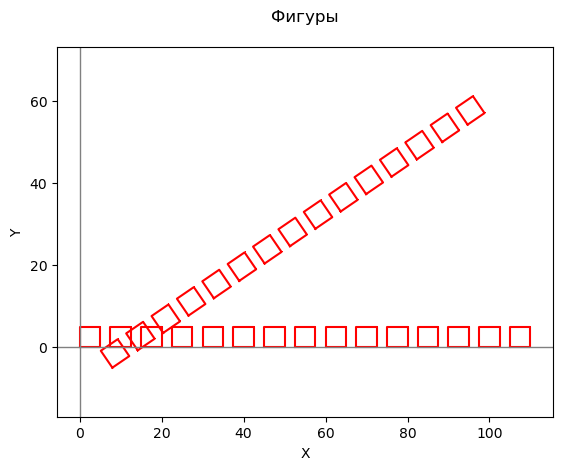

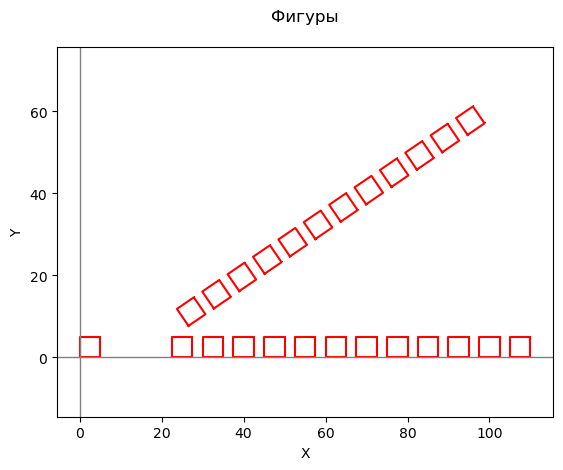

In [30]:
# 6.3
# используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур 
# имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.
# удаляем пересекающиеся фигуры
import matplotlib.path as mpath


def flt_intersect_fig(polygons):
    """
    фильтрация пересекающихся фигур (удаляем пересекающиеся)
    :polygons: последовательность фигур
    :return: последовательность непересекающихся фигур
    """
    # создаем список для хранения непересекающихся фигур
    non_intersecting_polygons = []

    # для каждого многоугольника в списке
    for i in range(len(polygons)):
        polygon = polygons[i]
        # создаем объект Path для многоугольника
        polygon_path = mpath.Path(polygon)

        # проверяем, пересекается ли многоугольник с любым из других многоугольников
        intersects = False
        for pol in polygons:
            if pol != polygon:
                if polygon_path.intersects_path(mpath.Path(pol)):
                    intersects = True
                    break

        # если многоугольник не пересекается, добавляем его в список непересекающихся фигур
        if not intersects:
            non_intersecting_polygons.append(polygon)
        
    return non_intersecting_polygons
            

# создаем список многоугольников для фильтрации
fig_lst = figures_list(gen_rectangle, side_len=5, number_of_figures=15)  # создаем список фигур
new_fig_lst = map(lambda x: tr_rotate(x, 0.6), deepcopy(fig_lst))  # создаем список фигур перемещая уже существующие
new_fig_lst = map(lambda x: tr_translate(x, displacement_x=8, displacement_y=-5), deepcopy(new_fig_lst))
polygons = list(new_fig_lst) + fig_lst

# визуализация исходных данных
visualise(polygons)
# визуализация непересекающихся многоугольников
visualise(flt_intersect_fig(polygons))


### задание 7

(сложность 1)

In [ ]:
# 7.1
# Реализовать декораторы и продемонстрировать корректность их работы
# Фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 5: 
# @flt_convex_polygon, @flt_angle_point, 
# @flt_square,         @flt_short_side, 
# @flt_point_inside,   @flt_polygon_angles_inside ;

In [169]:
# ok
def flt_convex_polygon_dec(func):
    def wrapper(figures):
        new_fig = list(filter(flt_convex_polygon, figures))
        result = func(new_fig)
        return result
    return wrapper


@flt_convex_polygon_dec
def some_function(figures):
    print(*figures, sep='\n')

    
figures=[
    ((0, 0), (2, 3), (3, 0)), 
    ((5, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0)),
        ]

some_function(figures)  # должно быть три фигуры

((0, 0), (2, 3), (3, 0))
((20, 0), (23, 4), (26, 5), (23, 0))
((27, 0), (27, 4), (28, 4), (28, 0))


In [180]:
# ok
def flt_angle_point_dec(func):
    def wrapper(figures, point):
        result = func(list(filter(lambda x: flt_angle_point(x, point), figures)), point)
        return result
    return wrapper


@flt_angle_point_dec
def some_function_1(figures, point):
    print(point)
    print(*figures, sep='\n')

    
figures=[
    ((0, 0), (2, 3), (3, 0)), 
    ((0, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0)),
        ]

some_function_1(figures, (0, 0))  # должно быть две фигуры

(0, 0)
((0, 0), (2, 3), (3, 0))
((0, 0), (6, 2), (5, 3), (8, 3), (8, 0))


In [179]:
# ok
def flt_area_dec(func):
    def wrapper(figures, area):
        new_figures = list(filter(lambda x: flt_area(x, area), figures))
        result = func(new_figures, area)
        return result
    return wrapper


@flt_area_dec
def some_function_2(figures, area):
    print(area)
    print(*figures, sep='\n')

    
figures=[
    ((0, 0), (2, 3), (3, 0)), 
    ((0, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0))
        ]

some_function_2(figures, 10)  # должно быть две фигуры

10
((0, 0), (2, 3), (3, 0))
((27, 0), (27, 4), (28, 4), (28, 0))


In [184]:
# ok
def flt_short_side_dec(func):
    def wrapper(figures, length):
        new_figures = list(filter(lambda x: flt_short_side(x, length), figures))
        result = func(new_figures, length)
        return result
    return wrapper


@flt_short_side_dec
def some_function_3(figures, length):
    print(length)
    print(*figures, sep='\n')

    
figures=[
    ((0, 0), (0, 2), (3, 0)), 
    ((0, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0))
        ]

some_function_3(figures, 2)  # должно быть 2 фигуры

2
((0, 0), (6, 2), (5, 3), (8, 3), (8, 0))
((27, 0), (27, 4), (28, 4), (28, 0))


In [188]:
# ok
def flt_point_inside_dec(func):
    def wrapper(figures, point):
        new_figures = list(filter(lambda x: flt_point_inside(x, point), figures))
        result = func(new_figures, point)
        return result
    return wrapper


@flt_point_inside_dec
def some_function_4(figures, point):
    print(point)
    print(*figures, sep='\n')

    
figures=[
    ((0, 0), (0, 4), (4, 0)), 
    ((0, 0), (6, 2), (5, 3), (8, 3), (8, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0))
        ]

some_function_4(figures, (0.))  # должно быть 1 фигура

(0.5, 0.5)
((0, 0), (0, 4), (4, 0))


In [232]:
# ok
def flt_polygon_angles_inside_dec(func):
    def wrapper(figures, polygon):
        new_figures = list(filter(lambda x: flt_polygon_angles_inside(x, polygon), figures))
        result = func(new_figures, polygon)
        return result
    return wrapper


@flt_polygon_angles_inside_dec
def some_function_5(figures, polygon):
    print(polygon)
    print(*figures, sep='\n')

    
figures = [
    ((0, 0), (0, 5), (7, 0)),  
    ((0, 0), (0, -5), (-7, 0)), 
    ((11, 0), (11, 4), (13, 2), (15, 4), (16, 2), (15, 0)), 
    ((20, 0), (23, 4), (26, 5), (23, 0)), 
    ((27, 0), (27, 4), (28, 4), (28, 0)),
    ((30, -2), (29, 5), (35, 6), (37, 2), (33, -3)),
        ]
polygon = ((0, 0), (0, 3), (3, 0))

some_function_5(figures, polygon)


((0, 0), (0, 3), (3, 0))
((0, 0), (0, 5), (7, 0))


In [237]:
# 7.2
# Реализовать декораторы и продемонстрировать корректность их работы
# Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3: 
# @tr_translate, @tr_rotate, @tr_symmetry, @tr_homothety ;

In [202]:
# ok
def tr_translate_dec(func):
    def wrapper(figures, **kwargs):
        new_figures = list(map(lambda x: tr_translate(x, kwargs['displacement_x'], kwargs['displacement_y']), deepcopy(figures)))
        result = func(new_figures, **kwargs)
        return result
    return wrapper

                           
# ok
def tr_rotate_dec(func):
    def wrapper(figures, **kwargs):
        new_figures = list(map(lambda x: tr_rotate(x, kwargs['alpha']), deepcopy(figures)))
        result = func(new_figures, **kwargs)
        return result
    return wrapper

                           
# ok
def tr_symmetry_dec(func):
    def wrapper(figures, **kwargs):
        new_figures = list(map(lambda x: tr_symmetry(x), deepcopy(figures)))
        result = func(new_figures, **kwargs)
        return result
    return wrapper

                           
# ok
def tr_homothety_dec(func):
    def wrapper(figures, **kwargs):
        new_figures = list(map(lambda x: tr_homothety(x, kwargs['x0'], kwargs['y0'], kwargs['k']), deepcopy(figures)))
        result = func(new_figures, **kwargs)
        return result
    return wrapper


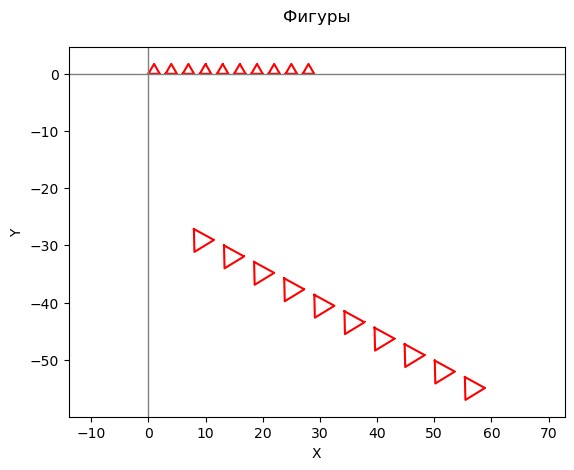

In [211]:
# пример работы декораторов
@tr_translate_dec 
@tr_rotate_dec
@tr_symmetry_dec
@tr_homothety_dec
def move_triangles(figures, displacement_x, displacement_y, x0, y0, k, alpha):
    return figures

fig_lst = figures_list(gen_triangle, side_len=2, number_of_figures=10)

# отзеркалили, сдвинули параллельно, повернули и сделали гомотетию
new_fig_lst = move_triangles(fig_lst, displacement_x=10, displacement_y=10, x0=0, y0=0, k=2, alpha=0.5)

# отобразим результат
visualise(fig_lst, new_fig_lst)

### задание 8

(сложность 2)

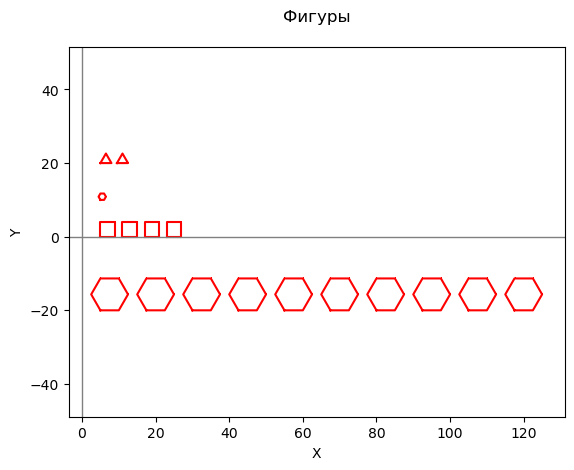

координата ближайшего к (0, 0) угла : (5, 0)


In [34]:
# 8.1
# поиск угла, самого близкого к началу координат ( agr_origin_nearest )
from functools import reduce

# берем фигуры для проверки из задания 6.2
visualise(figures_6_2)


# получаем координату ближайшего угла
def agr_origin_nearest(x, y):
    if (x[0]**2 + x[1]**2)**0.5 < (y[0]**2 + y[1]**2)**0.5:
        return x
    return y


nearest = reduce(agr_origin_nearest, [point for fig in figures_6_2 for point in fig])
print(f'координата ближайшего к (0, 0) угла : {nearest}')


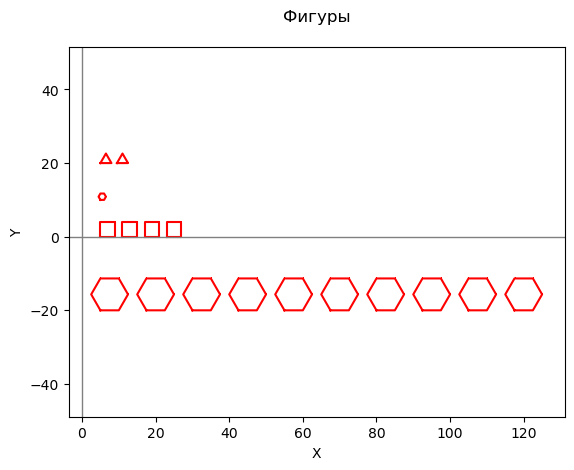

длина самой большой стороны: 5.0


In [35]:
# 8.2
# поиск самого длинной стороны многоугольника ( agr_max_side )

# берем фигуры для проверки из задания 6.2
visualise(figures_6_2)


# поиск самой длинной стороны многоугольников
def agr_max_side(x, y):
    if isinstance(x, float):
        figure = list(y)
        side_lengths = [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        side_lengths += [x]
    else:
        figure = list(x)
        # получение длин сторон фигур
        side_lengths = [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        figure = list(y)
        # получение длин сторон фигур
        side_lengths += [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
    return max(side_lengths)


longest = reduce(agr_max_side, [fig for fig in figures_6_2])
print(f'длина самой большой стороны: {longest}')


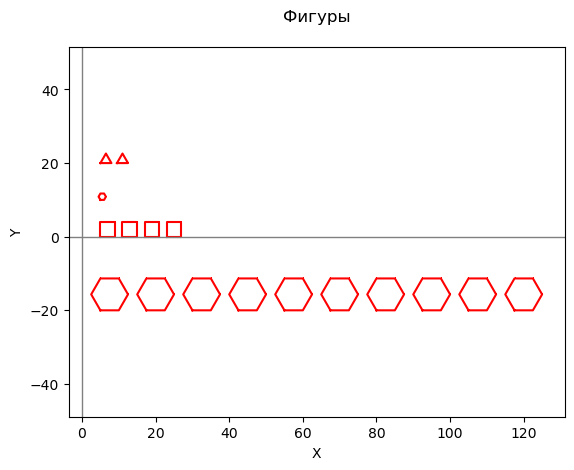

самая маленькая площадь : 2.598076211353316


In [36]:
# 8.3
# поиск самой маленькой площади многоугольника ( agr_min_area )

# берем фигуры для проверки из задания 6.2
visualise(figures_6_2)


# поиск самой маленькой площади
def agr_min_area(x, y):
    # polygon_area(figure) - функция из какогото предыдцщего задания
    if isinstance(x, float):
        x_area = x
        y_area = polygon_area(y)
    else:
        x_area = polygon_area(x)
        y_area = polygon_area(y)
    return min(x_area, y_area)


min_area = reduce(agr_min_area, [fig for fig in figures_6_2])
print(f'самая маленькая площадь : {min_area}')


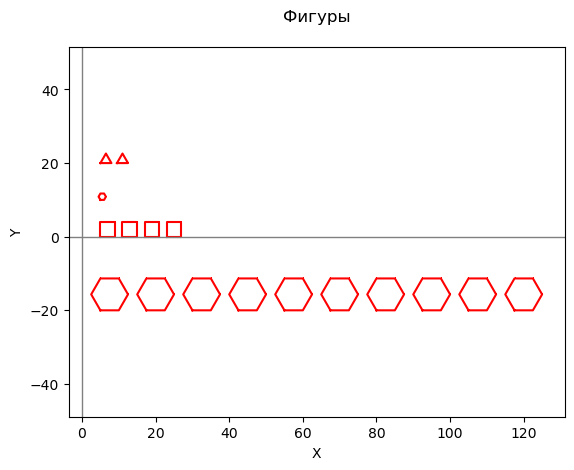

суммарный периметер: 388.0


In [37]:
# 8.4
# расчет суммарного периметра ( agr_perimeter )

# берем фигуры для проверки из задания 6.2
visualise(figures_6_2)


# расчет суммарного периметра
def agr_perimeter(x, y):
    if isinstance(x, float):
        figure = list(y)
        side_lengths = [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        perimeter = sum(side_lengths + [x])
    else:
        figure = list(x)
        # получение длин сторон фигур
        side_lengths = [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        figure = list(y)
        # получение длин сторон фигур
        side_lengths += [np.linalg.norm((figure[i][0] - figure[(i+1) % len(figure)][0], figure[i][1] - figure[(i+1) % len(figure)][1])) for i in range(len(figure))]
        perimeter = sum(side_lengths)
        
    return perimeter

perimeter = reduce(agr_perimeter, [fig for fig in figures_6_2])
print(f'суммарный периметер: {perimeter}')

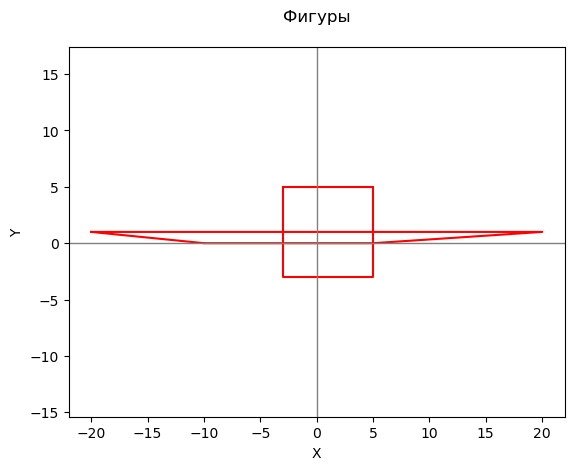

суммарная площадь : 91.5


In [38]:
# 8.5
# расчет суммарной площади ( agr_area )

# берем фигуры для проверки из задания 5.5
visualise(figures_5_5)


# поиск самой маленькой площади
def agr_area(x, y):
    # polygon_area(figure) - функция из какогото предыдцщего задания
    if isinstance(x, float):
        x_area = x
        y_area = polygon_area(y)
    else:
        x_area = polygon_area(x)
        y_area = polygon_area(y)
    return x_area + y_area


sum_area = reduce(agr_area, [fig for fig in figures_5_5])
print(f'суммарная площадь : {sum_area}')